<a href="https://colab.research.google.com/github/Balajivasudevan03/Logistic_Regression_model/blob/main/Logistics_Rgression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
A = pd.read_csv('/content/logistic_regression.csv')

In [ ]:
df = A.copy()

pd.set_option('display.max_columns', None)

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include="object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Johnson\r\nFPO AE 48052
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,category
int_rate,float64
installment,float64
grade,category
sub_grade,category
emp_title,category
emp_length,category
home_ownership,category
annual_inc,float64


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
numeric_cols.shape, categorical_cols.shape

((12,), (15,))

In [ ]:
print(numeric_cols)
print(categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


# Univariate Analysis

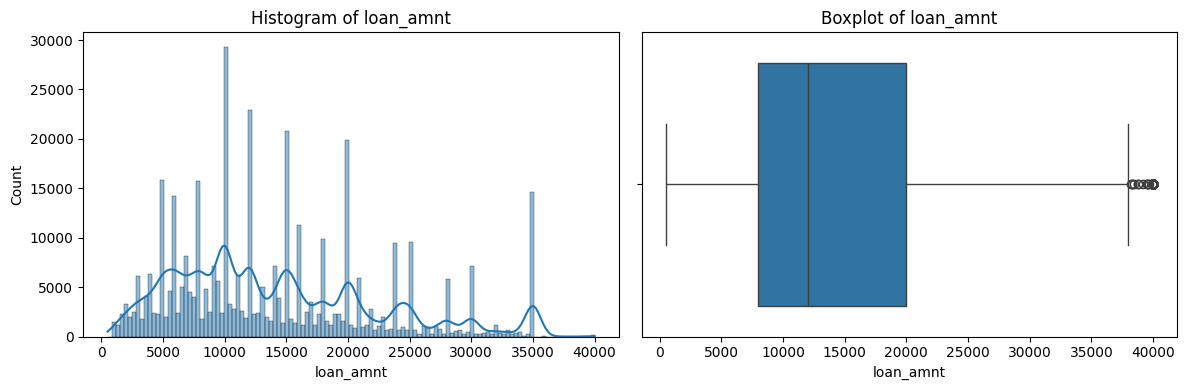

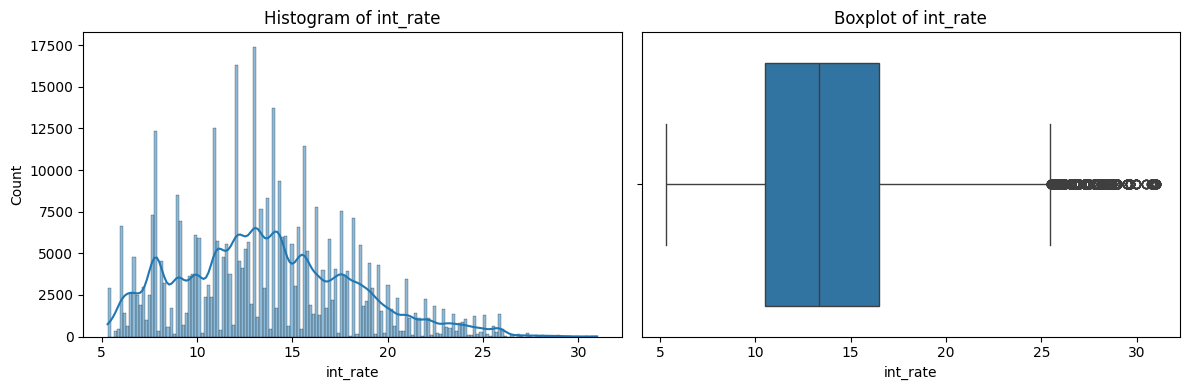

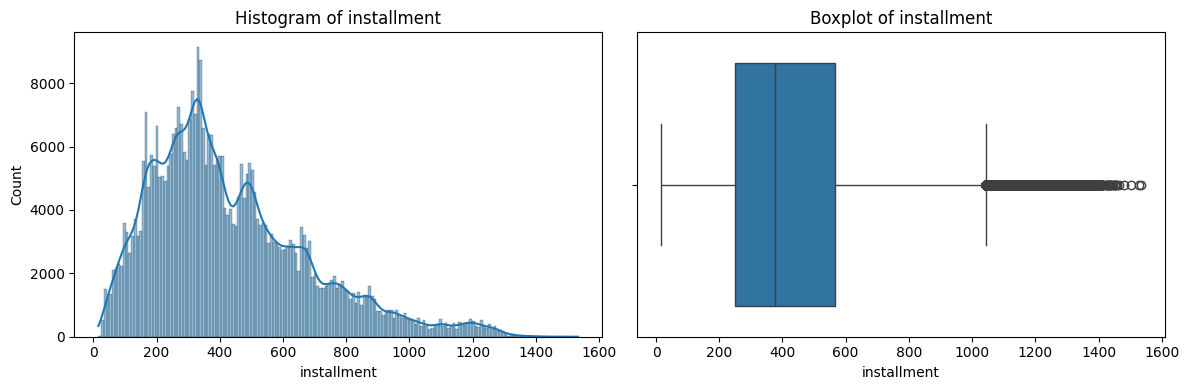

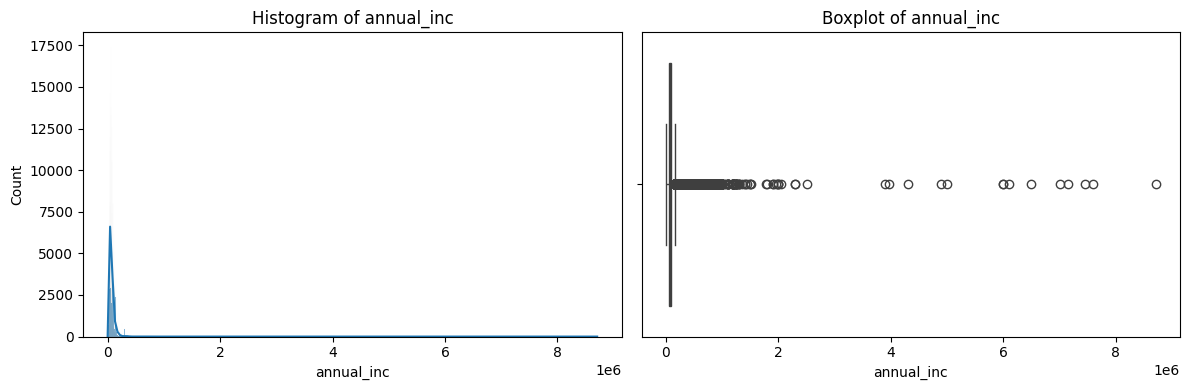

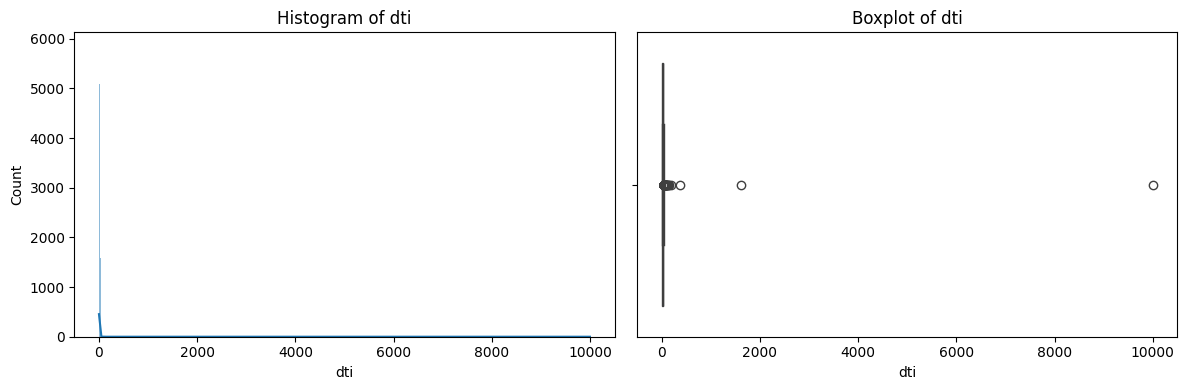

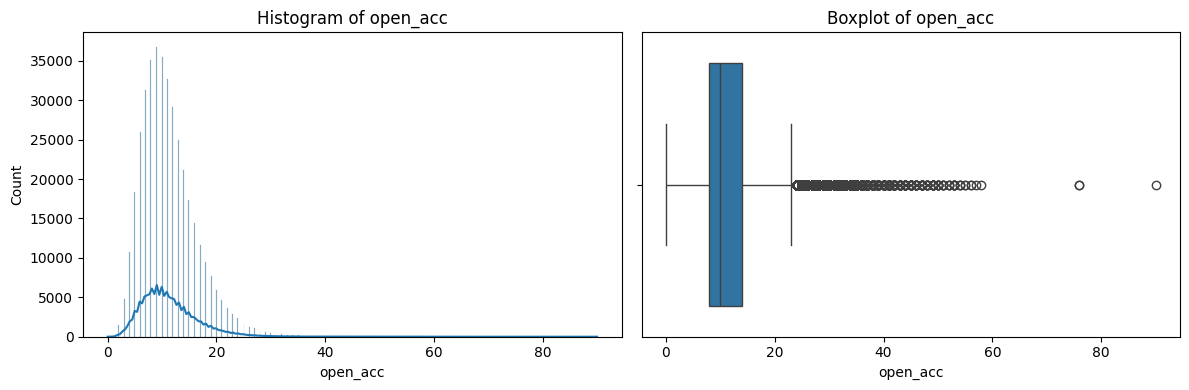

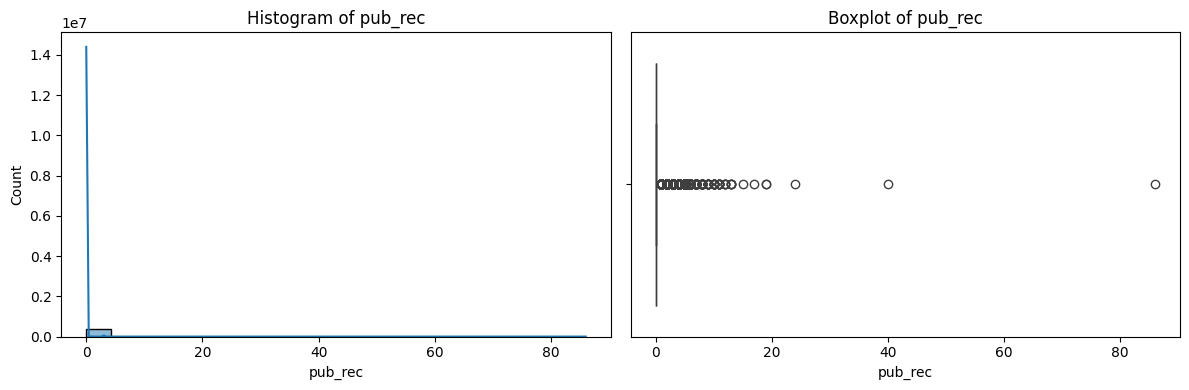

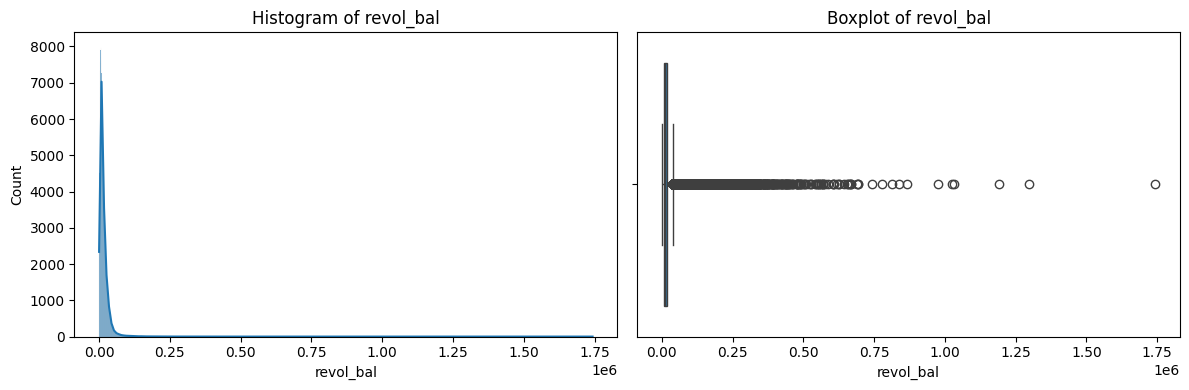

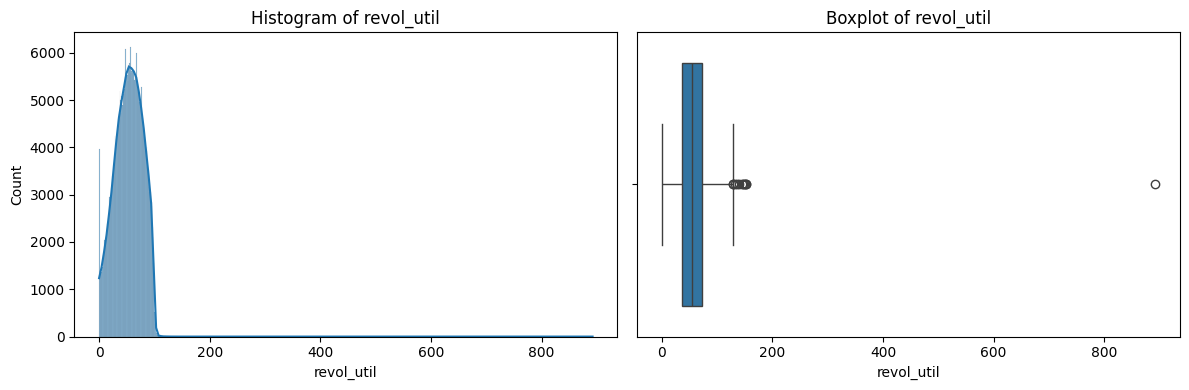

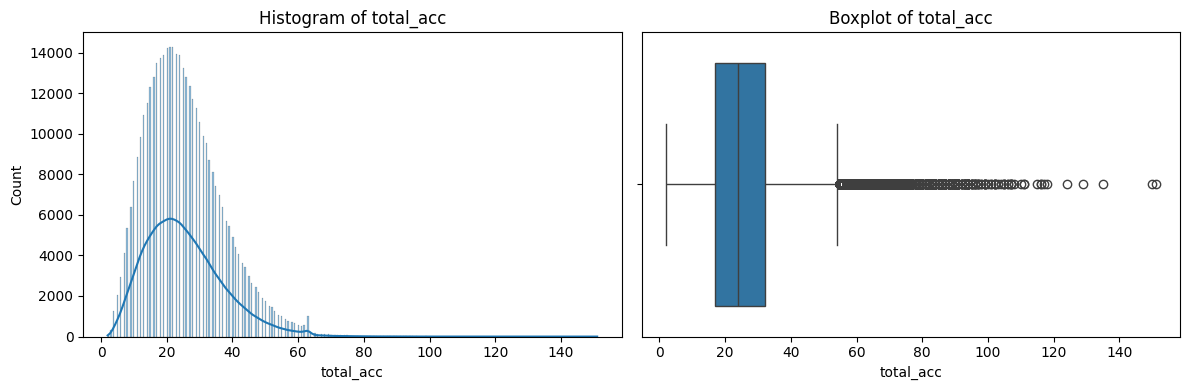

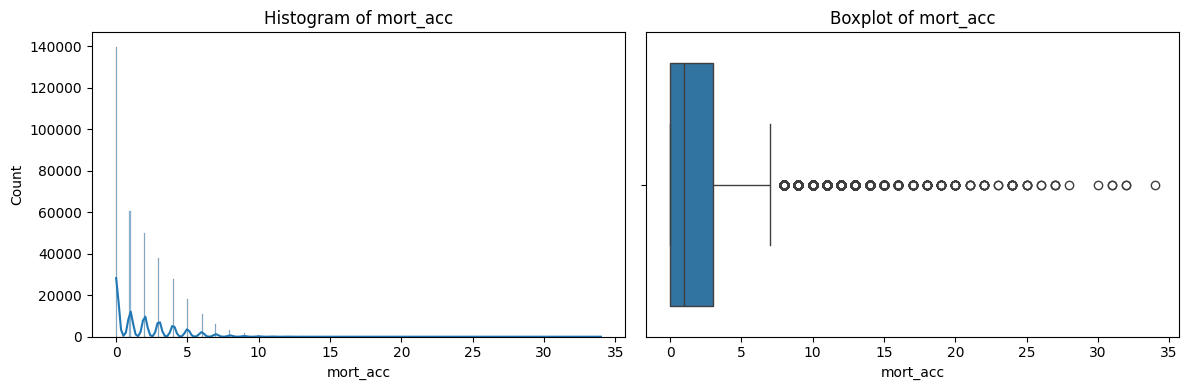

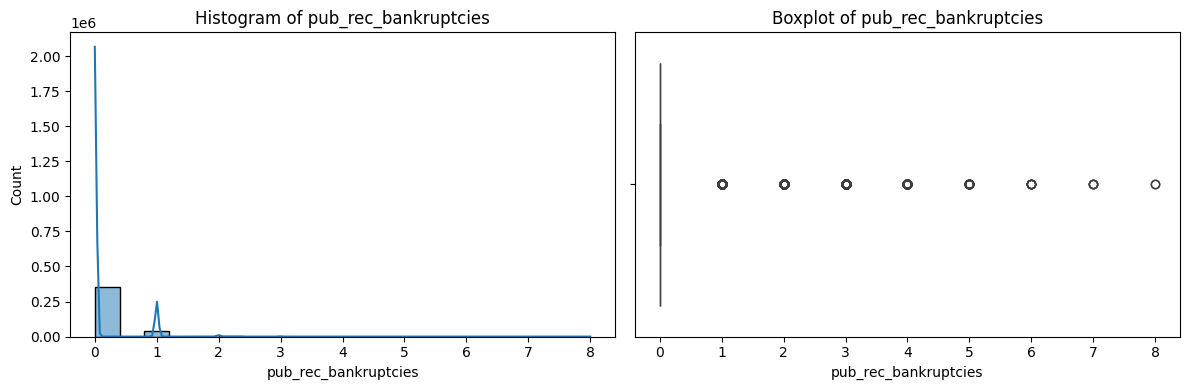

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# Numerical vs Numerical – Correlation Matrix

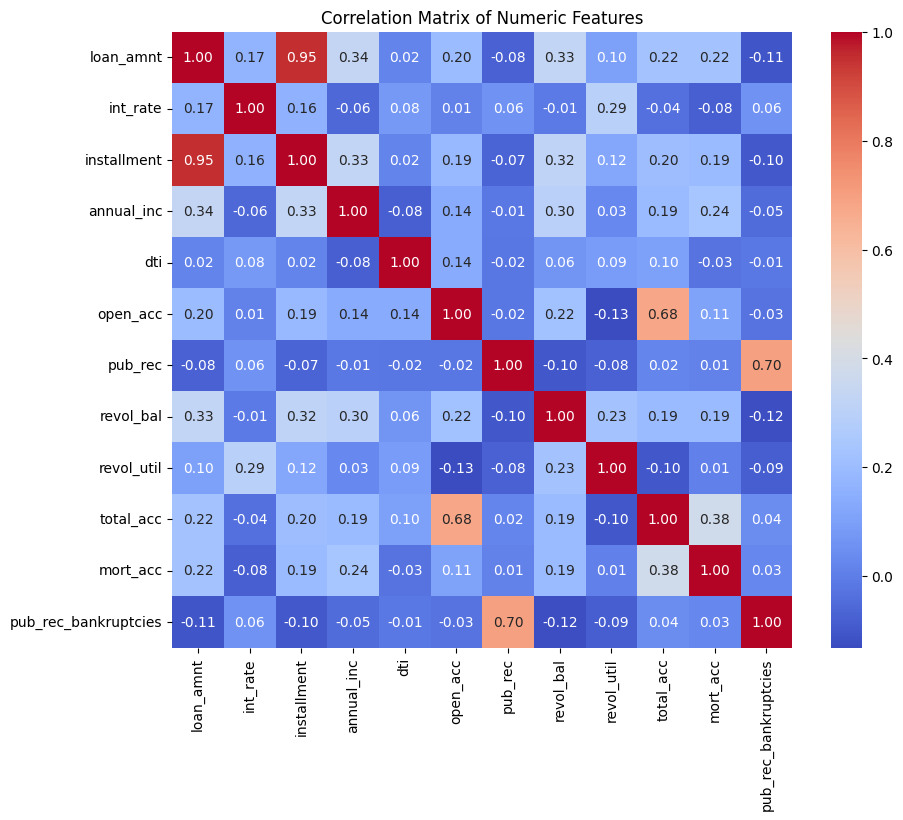

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Scatter Plots

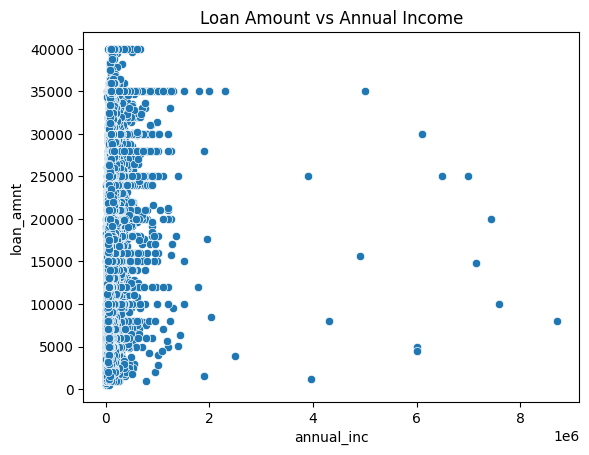

In [ ]:
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df)
plt.title("Loan Amount vs Annual Income")
plt.show()

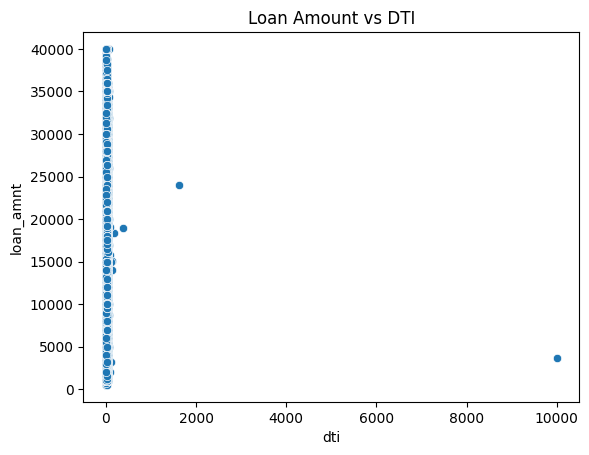

In [ ]:
sns.scatterplot(x='dti', y='loan_amnt', data=df)
plt.title("Loan Amount vs DTI")
plt.show()

# Numerical vs Categorical - Boxplots

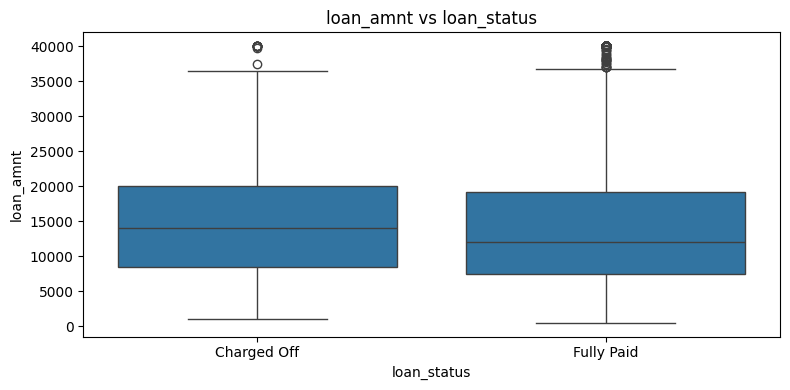

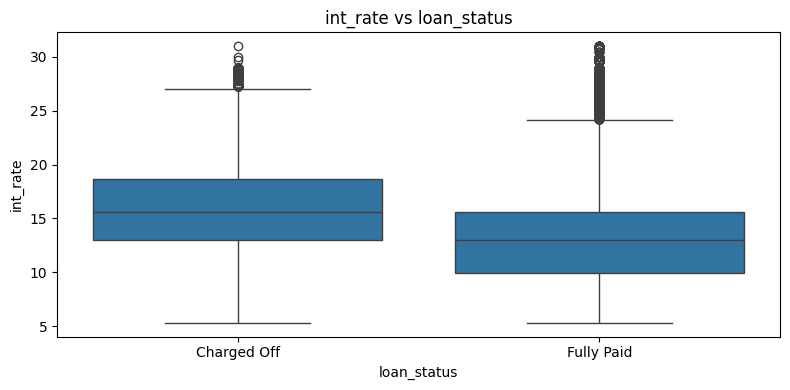

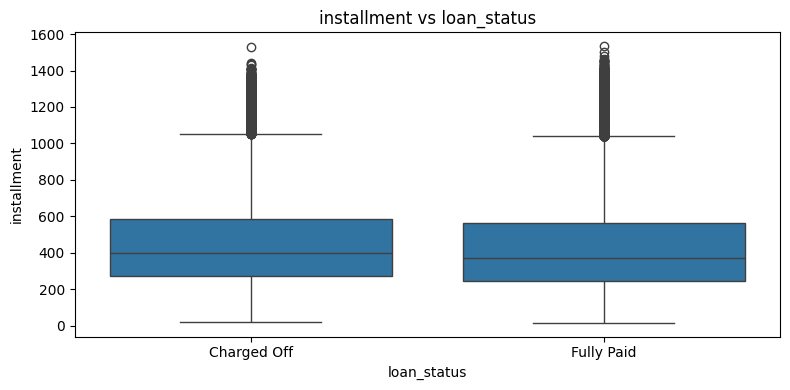

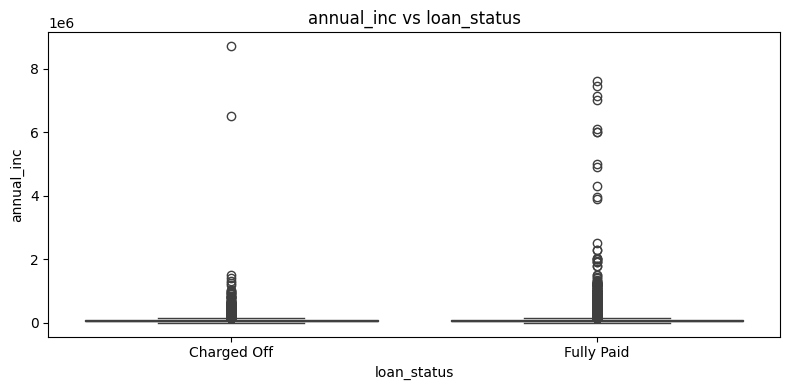

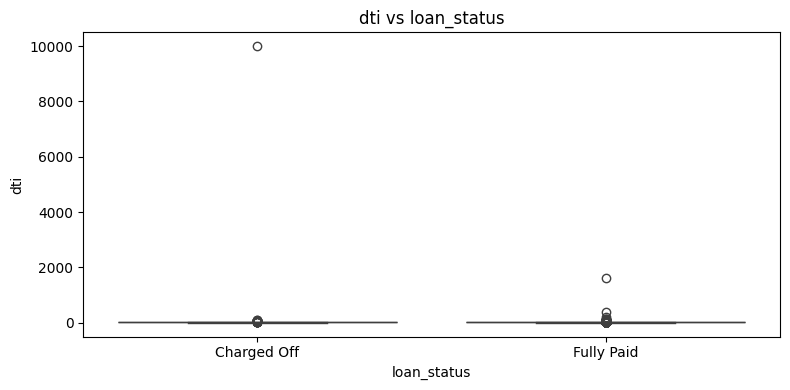

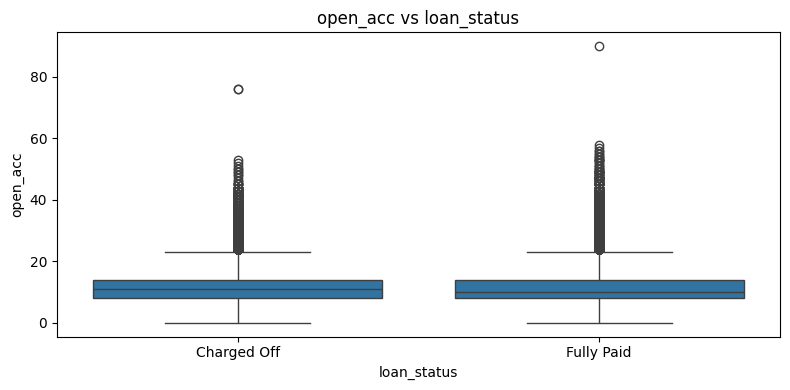

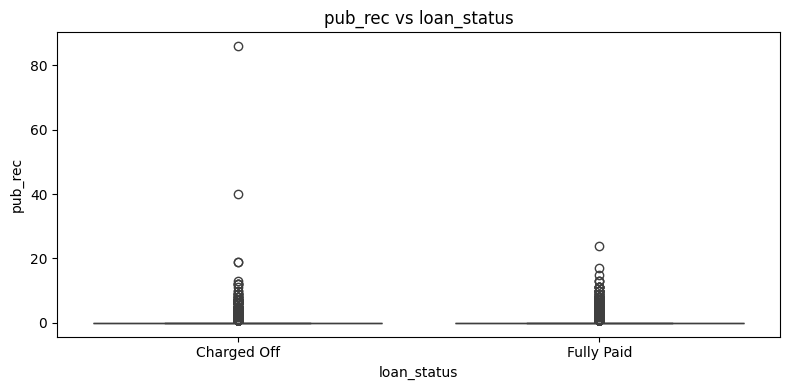

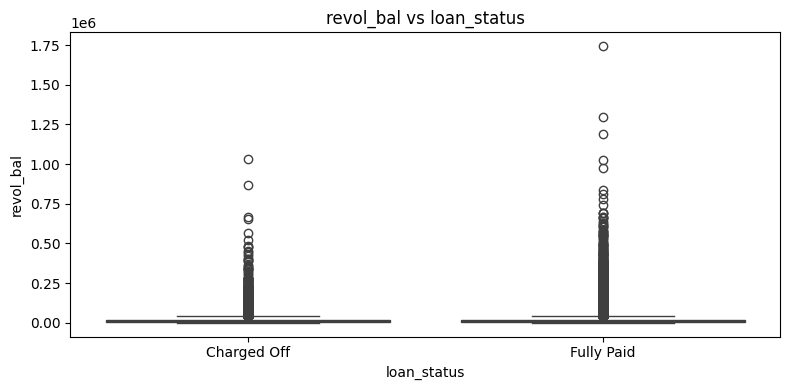

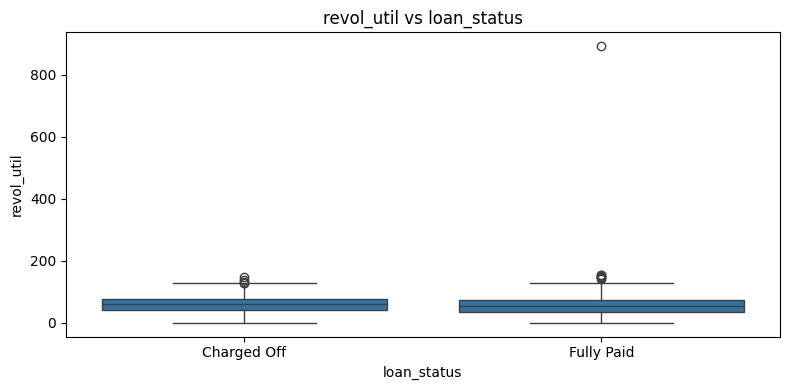

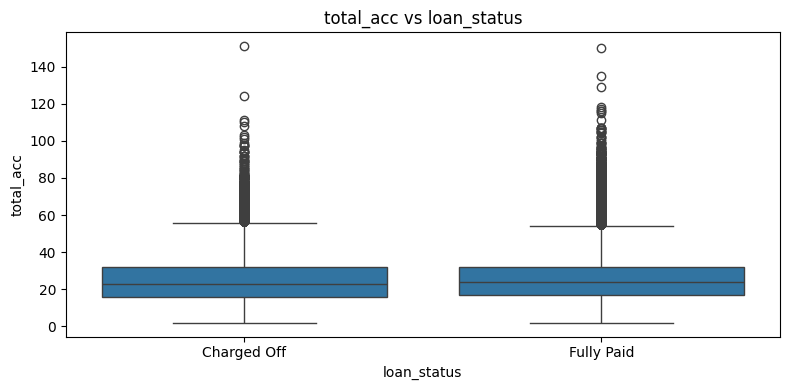

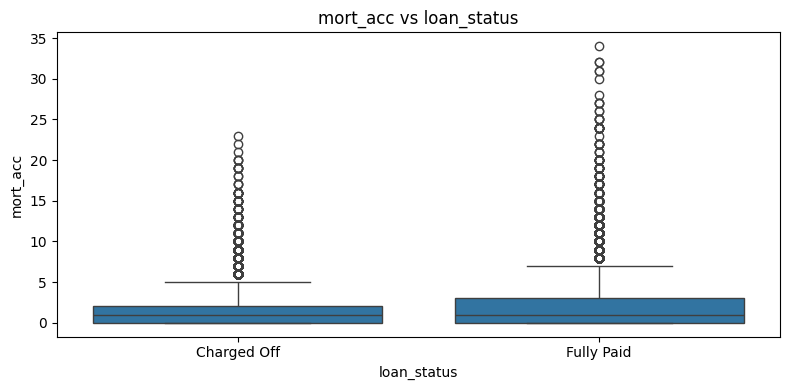

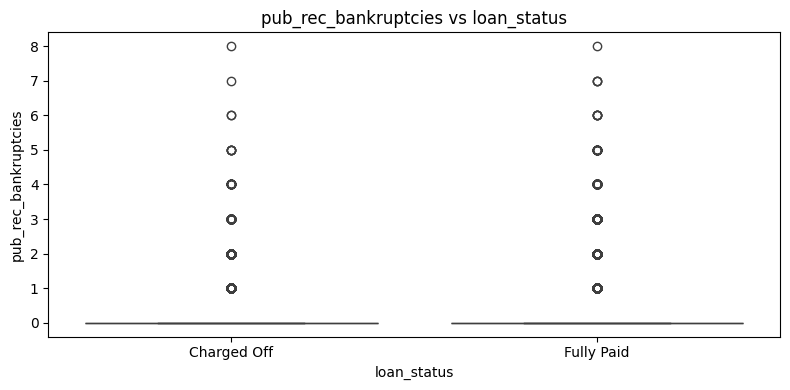

In [ ]:
target = 'loan_status'

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()


# Univariate analysis for categorical columns!!!

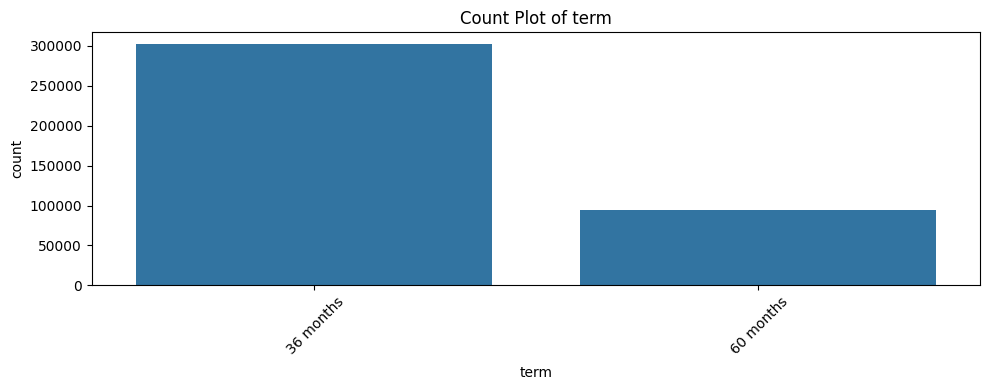

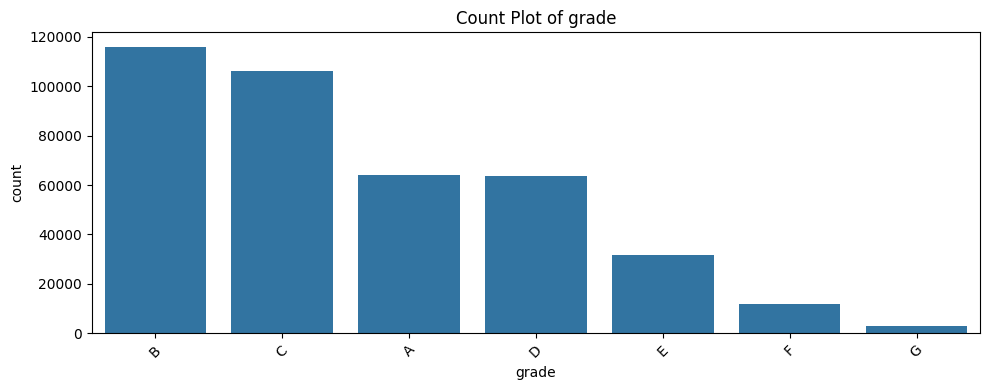


Column: sub_grade — too many unique values (35)

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
Name: count, dtype: int64

Column: emp_title — too many unique values (173105)

emp_title
Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: count, dtype: int64


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

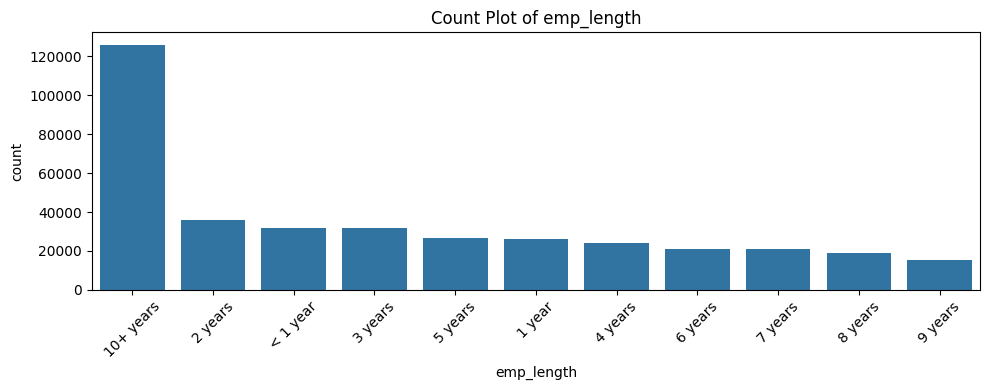

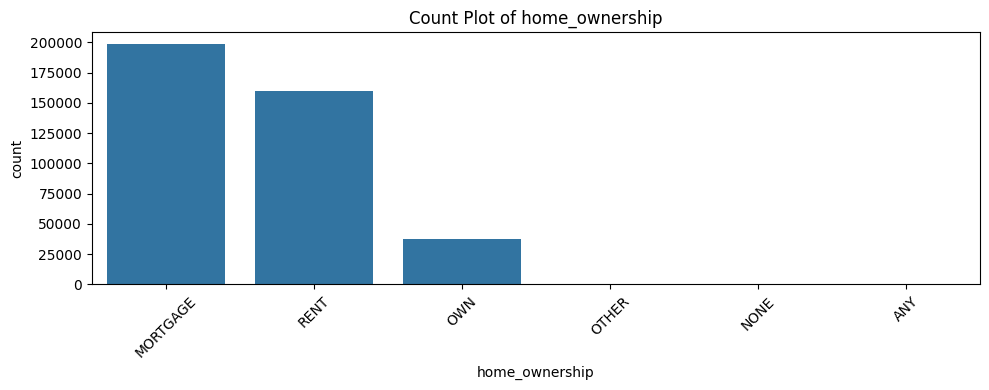

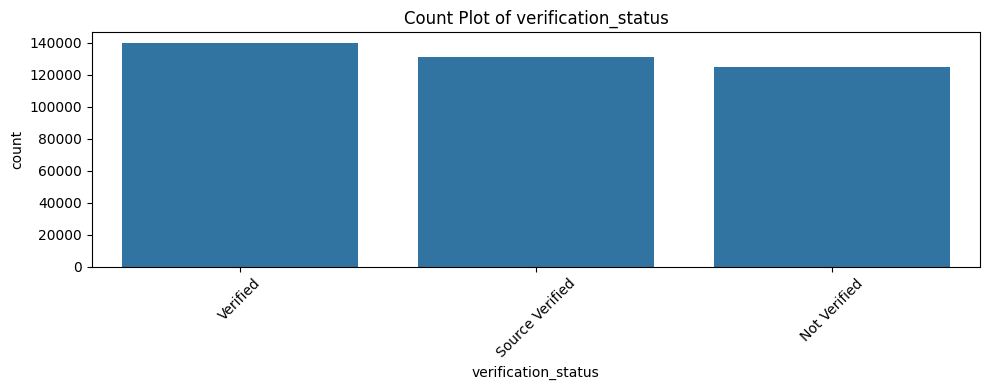


Column: issue_d — too many unique values (115)

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
Jul-2015    10270
Oct-2013    10047
Jan-2014     9705
Apr-2015     9470
Sep-2013     9179
Name: count, dtype: int64


<Figure size 1000x400 with 0 Axes>

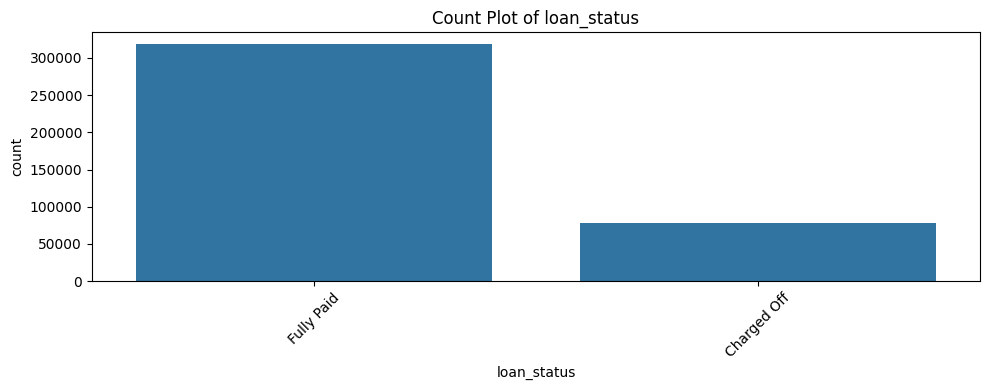

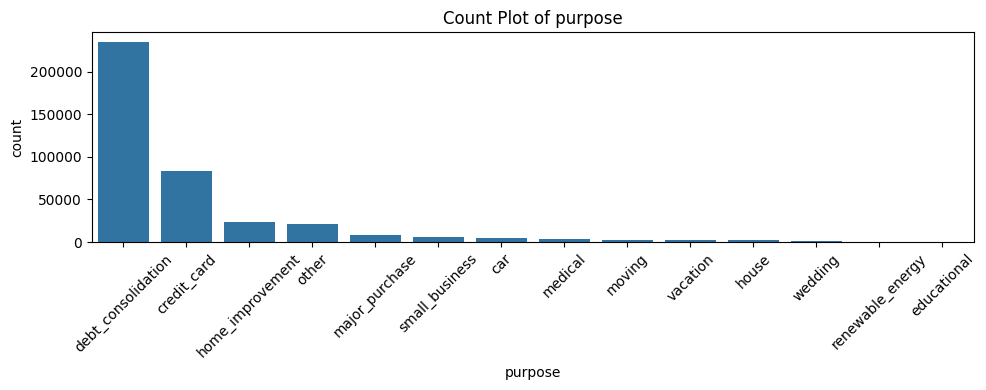


Column: title — too many unique values (48816)

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: count, dtype: int64

Column: earliest_cr_line — too many unique values (684)

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
Oct-1999    2726
Nov-1999    2700
Sep-2000    2691
Oct-2002    2640
Aug-2002    2599
Name: count, dtype: int64


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

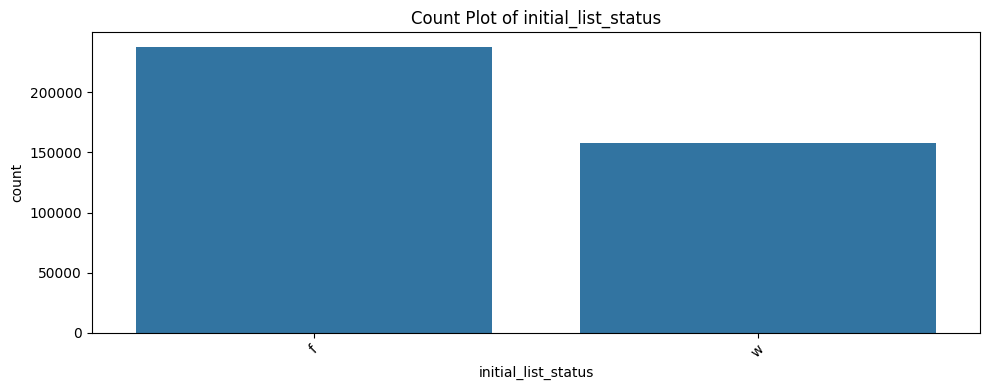

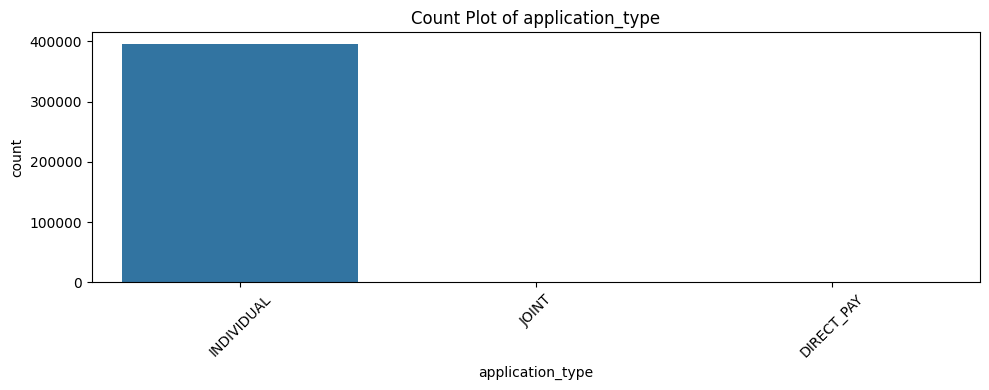


Column: address — too many unique values (393700)

address
USS Johnson\r\nFPO AE 48052     8
USNS Johnson\r\nFPO AE 05113    8
USCGC Smith\r\nFPO AE 70466     8
USS Smith\r\nFPO AP 70466       8
USNS Johnson\r\nFPO AP 48052    7
USCGC Jones\r\nFPO AE 22690     6
USNV Smith\r\nFPO AE 30723      6
USS Smith\r\nFPO AP 22690       6
USNS Johnson\r\nFPO AA 70466    6
USNV Brown\r\nFPO AA 48052      6
Name: count, dtype: int64


<Figure size 1000x400 with 0 Axes>

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    # Limit high cardinality columns (like emp_title, title, address)
    if df[col].nunique() < 20:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Count Plot of {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nColumn: {col} — too many unique values ({df[col].nunique()})\n")
        print(df[col].value_counts().head(10))

# Categorical vs Numerical

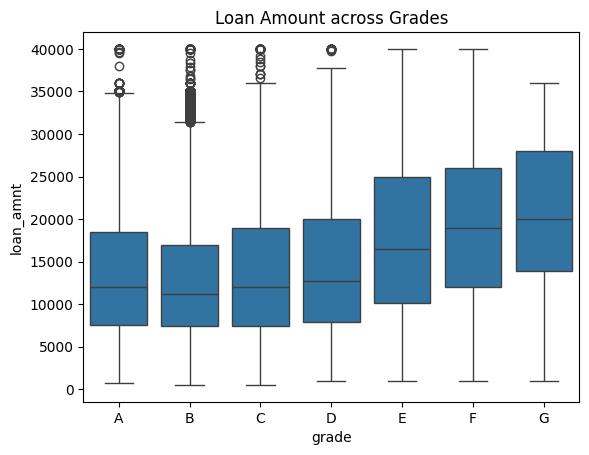

In [ ]:
sns.boxplot(x='grade', y='loan_amnt', data=df)
plt.title("Loan Amount across Grades")
plt.show()

# Categorical vs Target

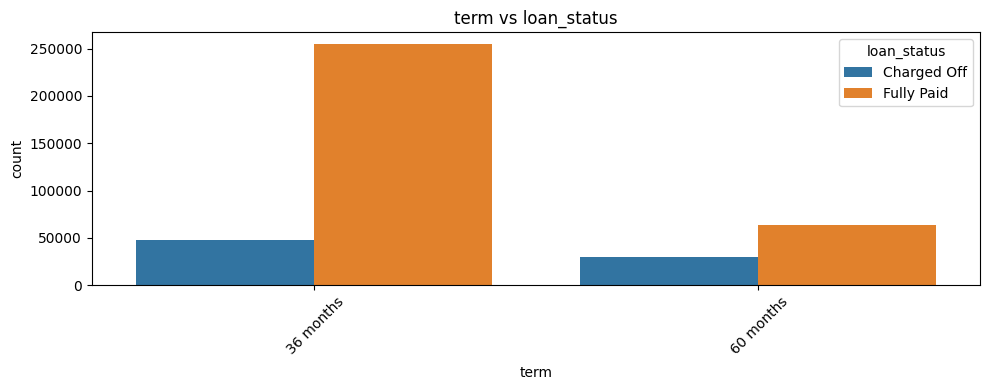

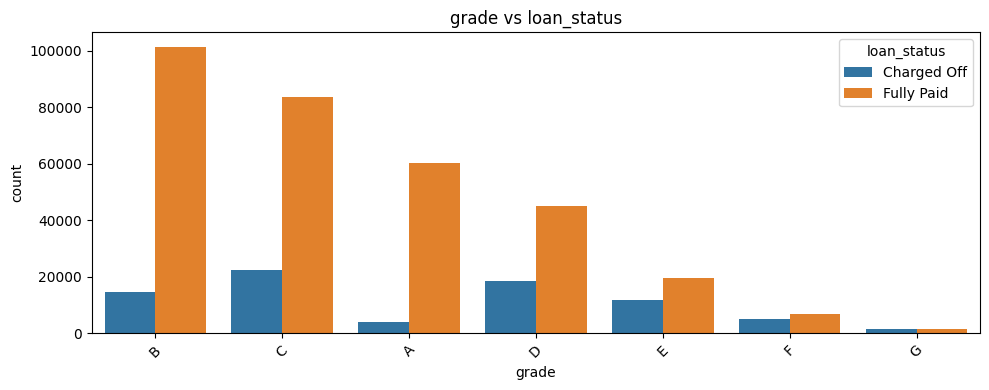

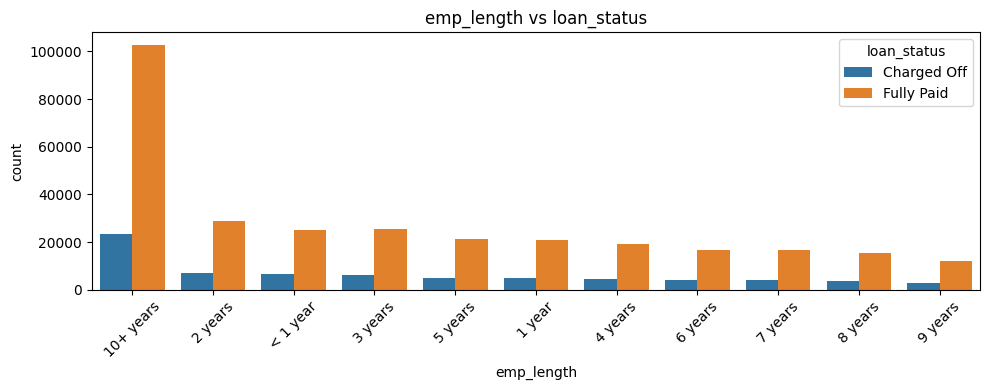

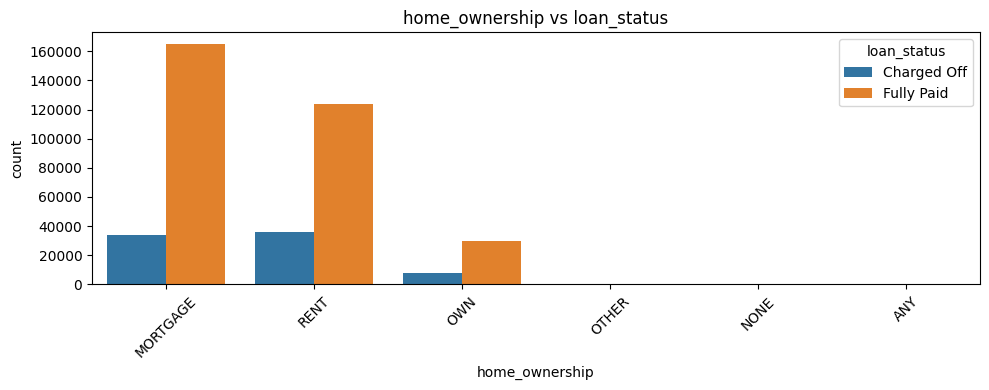

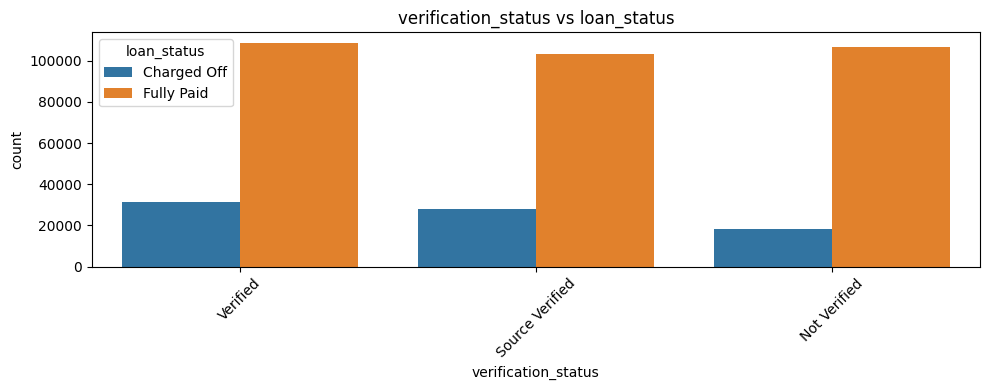

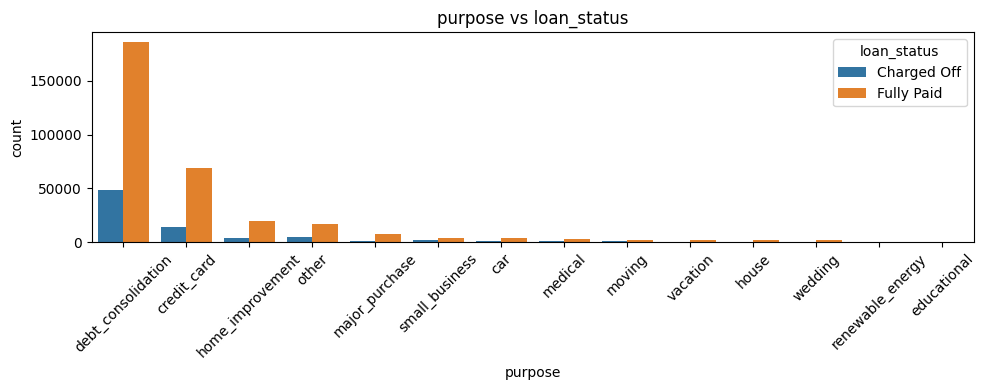

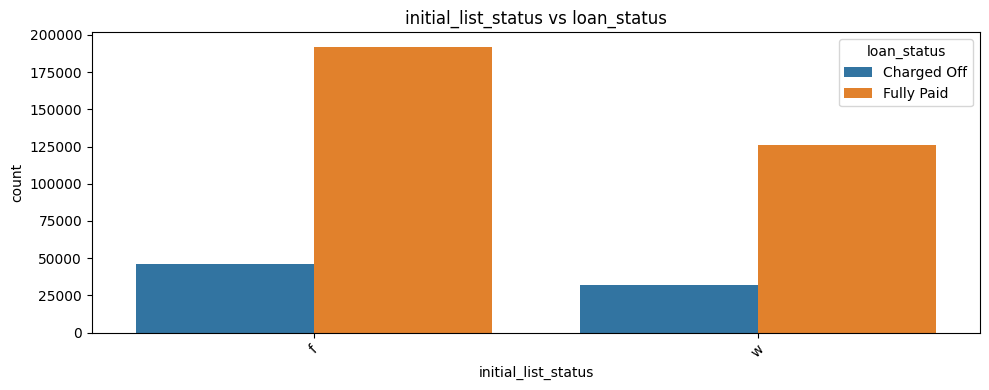

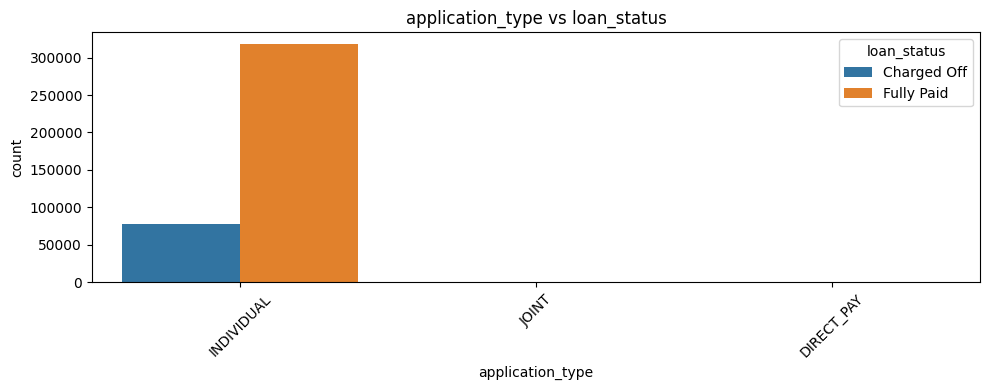

In [ ]:
target = 'loan_status'

for col in categorical_cols:
    if col != target and df[col].nunique() < 15:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, hue=target,
                      order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'{col} vs {target}')
        plt.tight_layout()
        plt.show()

In [ ]:
df_num = df.select_dtypes(include = np.number)

# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

loan_amnt               12000.00
int_rate                    6.00
installment               316.97
annual_inc              45000.00
dti                        11.70
open_acc                    6.00
pub_rec                     0.00
revol_bal               13595.00
revol_util                 37.10
total_acc                  15.00
mort_acc                    3.00
pub_rec_bankruptcies        0.00
dtype: float64


# deleting the outliers, because outliers can impact the pattern of the dataset!!!

In [ ]:
 # removing the outliers
df_iqr = df[~((df_num < (Q1-1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
df_iqr

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,Not Verified,Mar-2013,Fully Paid,debt_consolidation,Credit buster,10.81,Nov-1991,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\r\nWest Williamside,..."
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# checking for the duplicate records!!!!


In [ ]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [ ]:
subset_cols = ['loan_amnt', 'term', 'int_rate', 'emp_title', 'purpose', 'annual_inc']

duplicate_subset = df[df.duplicated(subset=subset_cols)]
print(f"Number of duplicate rows based on selected features: {duplicate_subset.shape[0]}")
duplicate_subset.head()

Number of duplicate rows based on selected features: 413


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
20715,12000.0,36 months,11.99,398.52,B,B3,Analyst,< 1 year,MORTGAGE,65000.0,Not Verified,Jan-2014,Fully Paid,debt_consolidation,consolidation,12.08,Mar-2005,7.0,0.0,15312.0,64.3,13.0,f,INDIVIDUAL,1.0,0.0,"9811 Alvarez Knoll\r\nMarkhaven, LA 30723"
22639,24000.0,36 months,11.53,791.77,B,B5,Accounting Manager,10+ years,RENT,95000.0,Verified,Jun-2015,Charged Off,debt_consolidation,Debt consolidation,6.39,Oct-2001,11.0,1.0,20357.0,73.2,32.0,f,INDIVIDUAL,4.0,1.0,"46244 Randy Village\r\nPort Jessicaland, AR 22690"
28758,5000.0,36 months,10.59,162.73,B,B2,NaN,10+ years,RENT,42000.0,Not Verified,Jun-2011,Fully Paid,credit_card,Pay off Credit Card Debt,16.11,Dec-1998,11.0,0.0,4193.0,91.2,22.0,f,INDIVIDUAL,NaN,0.0,"6750 Tommy Bypass\r\nAndersonville, GA 29597"
30335,35000.0,36 months,10.99,1145.69,B,B2,Attorney,7 years,MORTGAGE,300000.0,Verified,Dec-2013,Fully Paid,debt_consolidation,Consolidation,8.16,Jan-1996,18.0,0.0,70158.0,52.6,35.0,f,INDIVIDUAL,1.0,0.0,"7211 Melton Spur Suite 809\r\nPort Riley, OK 0..."
38401,18000.0,36 months,13.53,611.10,B,B5,Registered Nurse,9 years,MORTGAGE,90000.0,Source Verified,Jan-2014,Fully Paid,debt_consolidation,Debt consolidation,23.67,Nov-1995,20.0,0.0,25762.0,51.3,55.0,f,INDIVIDUAL,5.0,0.0,"01892 Watts Plains Suite 295\r\nOconnorview, M..."


Skewness of Continuous Variables:

dti                     431.051225
annual_inc               41.042725
pub_rec                  16.576564
revol_bal                11.727515
pub_rec_bankruptcies      3.423440
mort_acc                  1.600132
open_acc                  1.213019
installment               0.983598
total_acc                 0.864328
loan_amnt                 0.777285
int_rate                  0.420669
revol_util               -0.071778
dtype: float64


<ipython-input-26-1c92002626e1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')


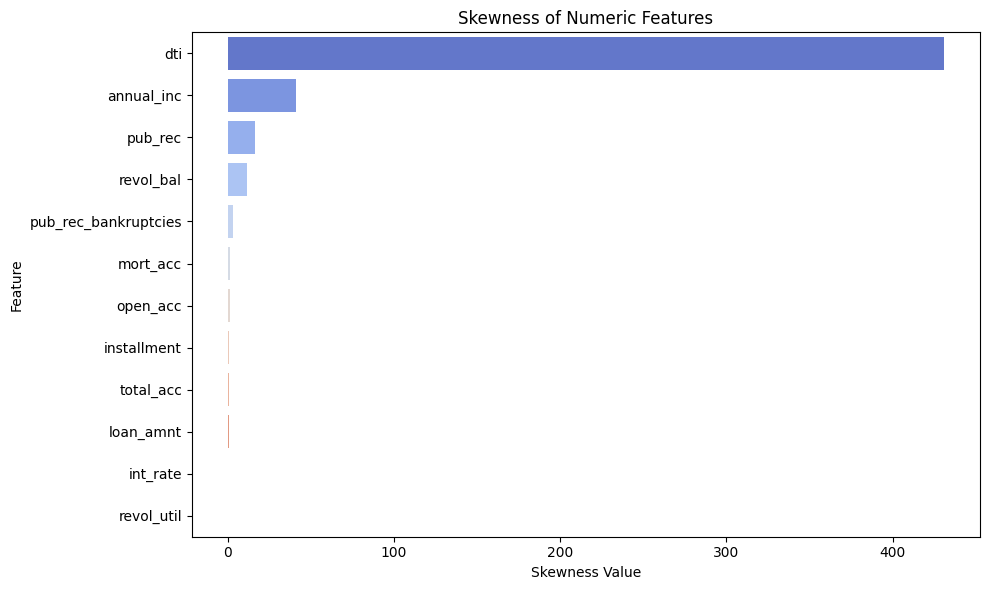

In [ ]:
# Skewness: < 0 = left skewed, > 0 = right skewed, ~0 = symmetric
print("Skewness of Continuous Variables:\n")
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print(skewness)

# Optional: visualize skewness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')
plt.title("Skewness of Numeric Features")
plt.xlabel("Skewness Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# identifying the columns with null values!!!

In [ ]:
null_values = df.isnull().sum().values>0

columns_with_null_values = df.isnull().sum().index[null_values]

# identifying the columns with correct data types!!!

In [ ]:
for i in columns_with_null_values:
  for j in df.columns:
    if i==j:
      print(i, ":", df[i].dtype)

emp_title : category
emp_length : category
title : category
revol_util : float64
mort_acc : float64
pub_rec_bankruptcies : float64


# imputing the columns with correct strategy for imputation!!!

In [ ]:
category_columns = ["emp_title", "emp_length", "title"]

countinous_columns = ["revol_util", "mort_acc", "pub_rec_bankruptcies"]

# median imputing for countinous columns!!!

In [ ]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy = 'median')

for i in countinous_columns:
  df[i] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(df[i])))

# mode imputing for category columns!!!

In [ ]:
freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode
for i in category_columns:
    df[i] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[i])))

# checking any null values in the dataframe!!!

In [ ]:
df[df.isnull().any(axis=1)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


# Feature engineering!!!

# creating the new columns from issue_d and earliest_cr_line

In [ ]:
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month

<ipython-input-33-c400b35c4278>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["issue_d"] = pd.to_datetime(df["issue_d"])
<ipython-input-33-c400b35c4278>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])


In [ ]:
df["address_1"] = df["address"].str.split(",").str[-1]

In [ ]:
df["address_state"] = df["address_1"].str.split(" ").str[1]

In [ ]:
df['address_state'] = df['address_state'].str.strip()

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,address_1,address_state
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",2015,1,1990,6,OK 22690,OK
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",2015,1,2004,7,SD 05113,SD
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",2015,1,2007,8,WV 05113,WV
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",2014,11,2006,9,MA 00813,MA
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",2013,4,1999,3,VA 11650,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,2015-10-01,Fully Paid,debt_consolidation,Debt consolidation,15.63,2004-11-01,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",2015,10,2004,11,DC 30723,DC
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,2015-02-01,Fully Paid,debt_consolidation,Debt consolidation,21.45,2006-02-01,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",2015,2,2006,2,LA 05113,LA
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,2013-10-01,Fully Paid,debt_consolidation,pay off credit cards,17.56,1997-03-01,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",2013,10,1997,3,NY 70466,NY
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,2012-08-01,Fully Paid,debt_consolidation,Loanforpayoff,15.88,1990-11-01,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",2012,8,1990,11,FL 29597,FL


In [ ]:
df.drop(columns = ["address_1"],inplace=True)

In [ ]:
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'n/a': np.nan  # Or np.nan
}

# Apply the mapping
df['emp_length_clean'] = df['emp_length'].map(emp_length_map)


In [ ]:
df.drop(columns="emp_length", inplace=True)

In [ ]:
df['has_pub_rec'] = np.where(df['pub_rec'] > 0, 1, 0)
df['has_mortgage'] = np.where(df['mort_acc'] > 0, 1, 0)
df['has_bankruptcy'] = np.where(df['pub_rec_bankruptcies'] > 0, 1, 0)


In [ ]:
df.drop(columns=["pub_rec", "mort_acc", "pub_rec_bankruptcies"], inplace=True)

In [ ]:
new_df = df.select_dtypes(include = ["object","category"]).columns
new_df

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address', 'address_state'],
      dtype='object')

In [ ]:
# If it's a category, first convert to string
df['term'] = df['term'].astype(str)

# Strip ' months' and convert to int
df['term_num'] = df['term'].str.replace(' months', '').astype(int)

df.drop(columns="term", inplace=True)

df.drop(columns=["issue_d", "earliest_cr_line", "address"], inplace=True)

In [ ]:
df_new_1 = df.select_dtypes(include = ["object","category"]).columns
df_new_1

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title',
       'initial_list_status', 'application_type', 'address_state'],
      dtype='object')

In [ ]:
# Basic binary conversion example
df['loan_status_num'] = df['loan_status'].map({
    'Fully Paid': 1,
    'Charged Off': 0
})

df.drop(columns="loan_status", inplace=True)

In [ ]:
df_new_2 = df.select_dtypes(include = ["object","category"]).columns
df_new_2

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'application_type', 'address_state', 'loan_status_num'],
      dtype='object')

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
for i in df_new_2:
  encoder = TargetEncoder()
  df[i] = encoder.fit_transform(df[i], df["loan_status_num"])

In [ ]:
df.dtypes

,0
loan_amnt,float64
int_rate,float64
installment,float64
grade,float64
sub_grade,float64
emp_title,float64
home_ownership,float64
annual_inc,float64
verification_status,float64
purpose,float64


In [ ]:
for i in df.columns:
  print(i, ":", df[i].skew())
  print("-"*50)

loan_amnt : 0.777285467097746
--------------------------------------------------
int_rate : 0.4206694719582165
--------------------------------------------------
installment : 0.983598160890438
--------------------------------------------------
grade : -0.5873247182088198
--------------------------------------------------
sub_grade : -0.5676421303048905
--------------------------------------------------
emp_title : -0.7483817760929807
--------------------------------------------------
home_ownership : -0.10521039998987426
--------------------------------------------------
annual_inc : 41.042724746560665
--------------------------------------------------
verification_status : 0.7583615066036764
--------------------------------------------------
purpose : -0.2854442993708102
--------------------------------------------------
title : 0.3274232438030421
--------------------------------------------------
dti : 431.05122535490415
--------------------------------------------------
open_acc : 

In [ ]:
df.head(5)

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,purpose,title,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,address_state,emp_length_clean,has_pub_rec,has_mortgage,has_bankruptcy,term_num,loan_status_num
0,10000.0,11.44,329.48,0.874270,0.861607,0.752860,0.773378,117000.0,0.853640,0.810767,0.794991,26.24,16.0,36369.0,41.8,25.0,0.799245,0.803913,2015,1,1990,6,0.807987,10.0,0,0,0,36,1.0
1,8000.0,11.99,265.68,0.874270,0.844963,0.782678,0.830439,65000.0,0.853640,0.792586,0.770359,22.05,17.0,20131.0,53.3,27.0,0.806940,0.803913,2015,1,2004,7,0.802962,4.0,0,1,0,36,1.0
2,15600.0,10.49,506.97,0.874270,0.876646,0.808007,0.773378,43057.0,0.785257,0.832882,0.807194,12.79,13.0,11987.0,92.2,26.0,0.806940,0.803913,2015,1,2007,8,0.795939,0.0,0,0,0,36,1.0
3,7200.0,6.49,220.65,0.937121,0.951814,0.829389,0.773378,54000.0,0.853640,0.832882,0.807194,2.60,6.0,5472.0,21.5,13.0,0.806940,0.803913,2014,11,2006,9,0.803902,6.0,0,0,0,36,1.0
4,24375.0,17.27,609.33,0.788191,0.754933,0.699281,0.830439,55000.0,0.776789,0.832882,0.910420,33.95,13.0,24584.0,69.8,43.0,0.806940,0.803913,2013,4,1999,3,0.804899,9.0,0,1,0,60,0.0


In [ ]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'title', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'issue_d_year',
       'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month',
       'address_state', 'emp_length_clean', 'has_pub_rec', 'has_mortgage',
       'has_bankruptcy', 'term_num', 'loan_status_num'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

In [ ]:
df_scaled.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'title', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'issue_d_year',
       'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month',
       'address_state', 'emp_length_clean', 'has_pub_rec', 'has_mortgage',
       'has_bankruptcy', 'term_num', 'loan_status_num'],
      dtype='object')

In [ ]:
scaled_array.shape

(396030, 29)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = df_scaled.columns
vif["VIF"] = [variance_inflation_factor(scaled_array, i) for i in range(df_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loan_amnt,58.95
2,installment,51.29
4,sub_grade,40.35
3,grade,22.62
1,int_rate,19.66
27,term_num,6.70
24,has_pub_rec,4.14
26,has_bankruptcy,4.09
15,total_acc,2.18
12,open_acc,2.04


# removing the highly corelated columns!!!

In [ ]:
df.drop(['installment', 'grade'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['loan_amnt', 'int_rate', 'sub_grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'title', 'dti',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'issue_d_year',
       'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month',
       'address_state', 'emp_length_clean', 'has_pub_rec', 'has_mortgage',
       'has_bankruptcy', 'term_num', 'loan_status_num'],
      dtype='object')

In [ ]:
df.shape

(396030, 27)

In [ ]:
X = df.drop('loan_status_num', axis=1)
y = df['loan_status_num']

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[-1.26107338e-01  8.72586135e-03  3.99505097e-01  1.33589071e+00
   1.30583043e-01 -7.73171183e-03  6.13815898e-02 -2.39760648e-01
   6.15488984e-01 -4.70896486e-01 -1.73671374e-01  5.06921122e-02
  -1.75441567e-01  7.72423522e-02 -5.04698271e-02  4.70093753e-03
   2.92272656e-01  6.51771229e-02  2.35460649e-04  4.14384710e-03
   2.88515854e-01  8.48894851e-02 -3.02173008e-02  5.98109581e-02
   4.44613370e-02 -2.23610622e-01]]
intercept =  [2.12801172]


# tuning the right value of C

In [ ]:
def accuracy(y_true, y_pred):
  #y_true = y_true.reshape(len(y_true))
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

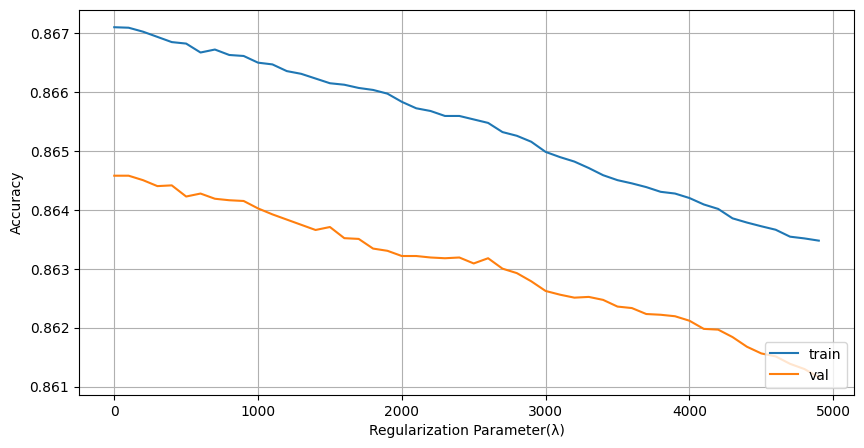

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Tuning the Right value of C

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Create a pipeline (scaling + model)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear'))  # 'liblinear' supports both l1 and l2
])

# Step 2: Define the grid of hyperparameters
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'clf__penalty': ['l1', 'l2']                # Type of regularization
}

# Step 3: Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 4: Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1'}
Best Accuracy Score: 0.8669418962724189


# Retraining the model!!!

In [ ]:
# Use the best parameters found
best_C = grid_search.best_params_['clf__C']
best_penalty = grid_search.best_params_['clf__penalty']

# Train the final model
final_model = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear')
final_model.fit(X_train, y_train)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8670176501780168
              precision    recall  f1-score   support

         0.0       0.73      0.52      0.60     15650
         1.0       0.89      0.95      0.92     63556

    accuracy                           0.87     79206
   macro avg       0.81      0.73      0.76     79206
weighted avg       0.86      0.87      0.86     79206



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear'))  # supports l1 and l2
])

# Parameter distribution
param_dist = {
    'clf__C': uniform(0.01, 10),
    'clf__penalty': ['l1', 'l2']
}

# Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              LogisticRegression(solver='liblinear'))]),
                   n_iter=20,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e514960e7d0>,
                                        'clf__penalty': ['l1', 'l2']},
                   random_state=42)

In [ ]:
# Best parameter values
best_params = random_search.best_params_

# Extracting best C and penalty specifically
best_C = best_params['clf__C']
best_penalty = best_params['clf__penalty']

print("Best C:", best_C)
print("Best penalty:", best_penalty)


Best C: 0.017787658410143285
Best penalty: l2


# checking the class imbalance!!!

In [ ]:
percentage_of_class_imbalance = df["loan_status_num"].value_counts(normalize=True) * 100

percentage_of_class_imbalance

,proportion
loan_status_num,
1.0,80.387092
0.0,19.612908


# checking the class imbalance!!!

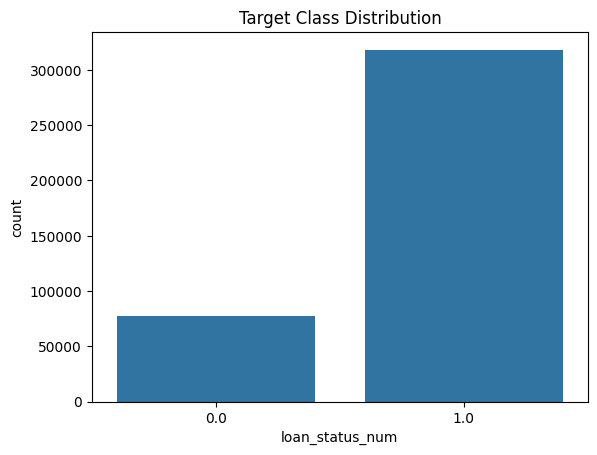

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_status_num', data=df)
plt.title("Target Class Distribution")
plt.show()

# Since the class imbalance is 80/20, we use the smote techniques to over sample the minority class

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features and target
#X = df.drop('loan_status_num', axis=1)
#y = df['loan_status_num']

# Split data before applying SMOTE
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: loan_status_num
1.0    191163
0.0     46455
Name: count, dtype: int64
After SMOTE: loan_status_num
1.0    191163
0.0    191163
Name: count, dtype: int64


# Retraining the model!!!

In [ ]:
final_model_1 = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear')
final_model_1.fit(X_train_res, y_train_res)

# Step 4: Evaluate on untouched test data
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.52      0.60     15650
         1.0       0.89      0.95      0.92     63556

    accuracy                           0.87     79206
   macro avg       0.81      0.73      0.76     79206
weighted avg       0.86      0.87      0.86     79206



In [ ]:
coefficients = final_model_1.coef_[0]  # For binary classification
feature_names = X.columns      # Make sure this matches the features used to train the model

# Create a DataFrame for easy viewing
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

# Display
print(coef_df)

                   Feature  Coefficient
3                emp_title     1.470864
8                    title     0.610985
9                      dti    -0.594501
2                sub_grade     0.455678
20           address_state     0.302555
25                term_num    -0.222549
7                  purpose    -0.214671
12              revol_util    -0.193854
10                open_acc    -0.193247
16            issue_d_year     0.184218
0                loan_amnt    -0.146447
4           home_ownership     0.133300
13               total_acc     0.107080
21        emp_length_clean     0.071175
6      verification_status     0.070688
1                 int_rate     0.061470
11               revol_bal     0.056219
17           issue_d_month     0.053186
24          has_bankruptcy     0.052454
14     initial_list_status    -0.052138
22             has_pub_rec    -0.043481
18   earliest_cr_line_year    -0.036568
23            has_mortgage     0.023263
19  earliest_cr_line_month    -0.004075


In [ ]:
coefs = final_model_1.coef_[0]                  # If binary classification
features = X.columns                    # X is your training feature DataFrame

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Importance': np.abs(coefs),
    'Direction': ['Positive' if c > 0 else 'Negative' for c in coefs]
})

# Sort by importance
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Display top features
print(coef_df.head(10))

          Feature  Coefficient  Importance Direction
3       emp_title     1.470864    1.470864  Positive
8           title     0.610985    0.610985  Positive
9             dti    -0.594501    0.594501  Negative
2       sub_grade     0.455678    0.455678  Positive
20  address_state     0.302555    0.302555  Positive
25       term_num    -0.222549    0.222549  Negative
7         purpose    -0.214671    0.214671  Negative
12     revol_util    -0.193854    0.193854  Negative
10       open_acc    -0.193247    0.193247  Negative
16   issue_d_year     0.184218    0.184218  Positive


# ROC AUC curve

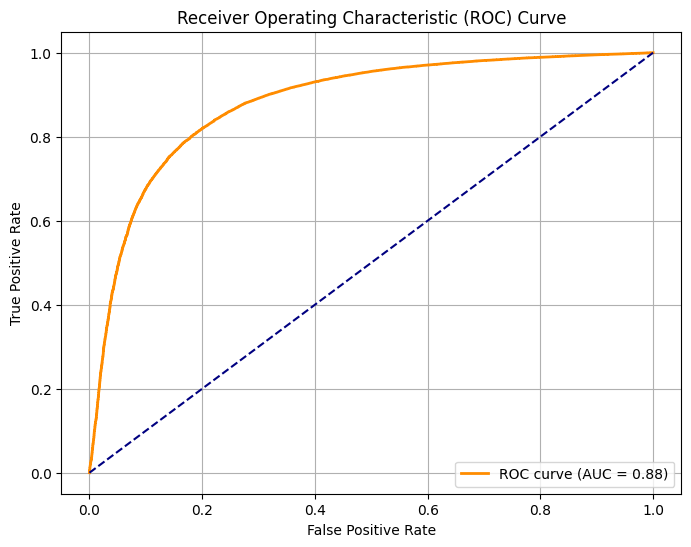

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_probs = final_model_1.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = final_model_1.predict(X_test)

# 1. ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Precision-Recall curve

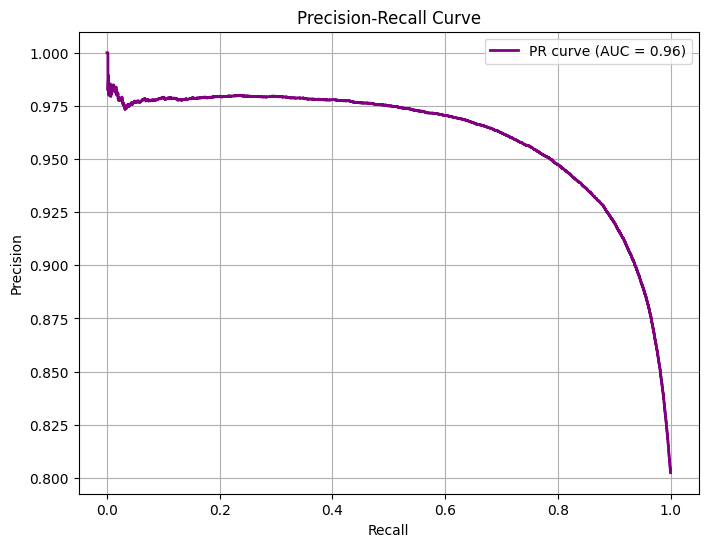

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# confusion matrix!!!

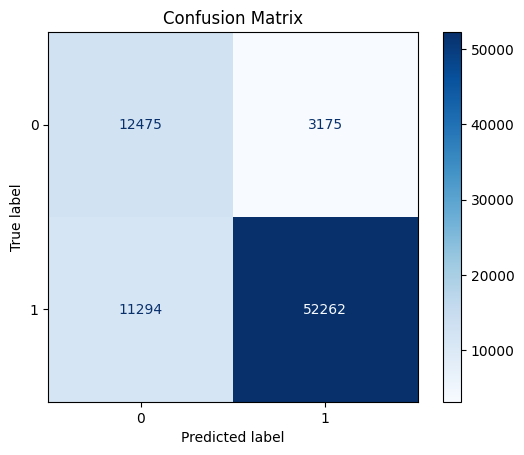

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred = final_model_1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


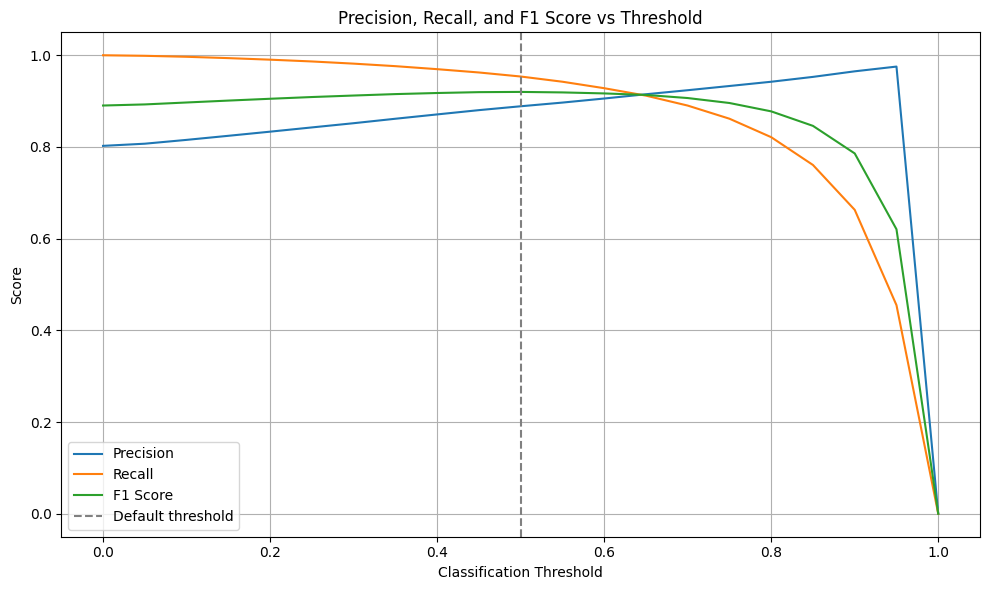

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.05, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision")
plt.plot(thresholds, recall_scores, label="Recall")
plt.plot(thresholds, f1_scores, label="F1 Score")
plt.axvline(x=0.5, color='gray', linestyle='--', label="Default threshold")
plt.xlabel("Classification Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Finding the optimal threshold!!!

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Thresholds to test
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

# Predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate each threshold
for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Find the threshold with the max F1 Score
best_index = np.argmax(f1_scores)
optimal_threshold = thresholds[best_index]

print(f"🔍 Best F1 Score: {f1_scores[best_index]:.4f} at Threshold: {optimal_threshold}")


🔍 Best F1 Score: 0.9201 at Threshold: 0.5


In [ ]:
optimal_threshold = 0.5  # Pick based on tradeoff you prefer
y_final_pred = (y_probs >= optimal_threshold).astype(int)

# Adjusted confusion matrix!!!

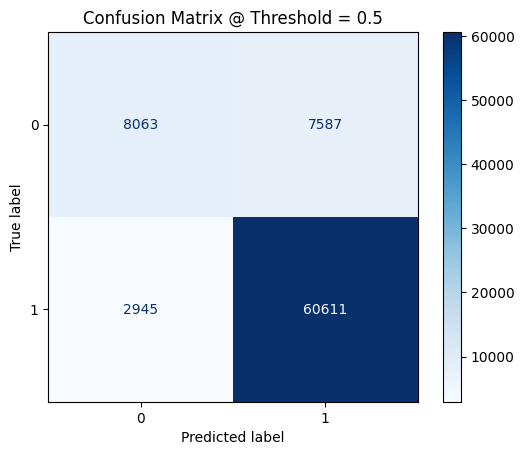

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix @ Threshold = {optimal_threshold}')
plt.show()
